In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd "/content/drive/MyDrive/cs424-assignment2"
!pwd

Mounted at /content/drive
/content/drive/MyDrive/cs424-assignment2
/content/drive/MyDrive/cs424-assignment2


## **Task 1**: Data importing & transformation

In [ ]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/cs424-assignment2/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2018-Current.csv')

# Data Exploration
print(df.head())  # Displays the first few rows of the dataset
print(df.info())  # Displays column data types and non-null counts
print(df.describe())  # Displays summary statistics for numerical columns
print(df['STREET'].unique())  # Displays unique values in the 'STREET' column
print(df.shape)  # Displays the shape of the data before cleaning

                     TIME  SEGMENT_ID  SPEED               STREET DIRECTION  \
0  11/20/2020 11:10:58 AM      1171.0   23.0               Harlem        SB   
1  11/20/2020 11:10:26 AM       176.0   -1.0             Garfield        WB   
2  11/20/2020 11:10:29 AM        37.0   18.0              Pulaski        NB   
3  11/20/2020 11:10:44 AM       719.0   24.0  Dr Martin L King Jr        SB   
4  11/20/2020 11:10:55 AM       495.0   -1.0               Archer        EB   

  FROM_STREET TO_STREET  LENGTH STREET_HEADING             COMMENTS  ...  \
0   North Ave   Chicago    1.01              N  Outside City Limits  ...   
1     Ashland     Damen    0.50              W                  NaN  ...   
2        31st      26th    0.50              S                  NaN  ...   
3        24th      26th    0.26              S                  NaN  ...   
4     Central   Laramie    0.51              S                  NaN  ...   

   HOUR  DAY_OF_WEEK  MONTH          RECORD_ID  START_LATITUDE  \
0 

In [26]:
# Data Cleaning: Remove rows with missing values
df_clean = df.dropna()

In [27]:
# Data Exploration after Cleaning
print(df_clean.head())  # Displays the first few rows of the cleaned dataset
print(df_clean.shape)  # Displays the shape of the data after cleaning

                      TIME  SEGMENT_ID  SPEED   STREET DIRECTION FROM_STREET  \
0   11/20/2020 11:10:58 AM      1171.0   23.0   Harlem        SB   North Ave   
19  11/20/2020 11:10:34 AM       384.0   26.0  Western        SB        43rd   
20  11/20/2020 11:10:41 AM       265.0   31.0     87th        WB     Pulaski   
39  11/20/2020 11:10:53 AM       957.0   21.0     Ohio        EB    Michigan   
55  11/20/2020 11:10:28 AM        20.0   35.0  Pulaski        NB       107th   

    TO_STREET  LENGTH STREET_HEADING  \
0     Chicago    1.01              N   
19       47th    0.50              S   
20    Kostner    0.50              W   
39  Fairbanks    0.20              E   
55      103rd    0.50              S   

                                      COMMENTS  ...  HOUR  DAY_OF_WEEK  MONTH  \
0                          Outside City Limits  ...  11.0          6.0   11.0   
19  Western Blvd Run Parallel on the East Side  ...  11.0          6.0   11.0   
20                       IDOT Signa

In [28]:
# Columns in the Dataset
columns_in_dataset = df.columns
print("Columns in the dataset:")
print(columns_in_dataset)

Columns in the dataset:
Index(['TIME', 'SEGMENT_ID', 'SPEED', 'STREET', 'DIRECTION', 'FROM_STREET',
       'TO_STREET', 'LENGTH', 'STREET_HEADING', 'COMMENTS', 'BUS_COUNT',
       'MESSAGE_COUNT', 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'RECORD_ID',
       'START_LATITUDE', 'START_LONGITUDE', 'END_LATITUDE', 'END_LONGITUDE',
       'START_LOCATION', 'END_LOCATION'],
      dtype='object')


In [29]:
# Check for Spatial or Temporal Component
spatial_columns = ['START_LATITUDE', 'START_LONGITUDE', 'END_LATITUDE', 'END_LONGITUDE']
temporal_columns = ['TIME', 'HOUR', 'DAY_OF_WEEK', 'MONTH']
print("Spatial Component Columns:")
print(spatial_columns)
print("Temporal Component Columns:")
print(temporal_columns)

Spatial Component Columns:
['START_LATITUDE', 'START_LONGITUDE', 'END_LATITUDE', 'END_LONGITUDE']
Temporal Component Columns:
['TIME', 'HOUR', 'DAY_OF_WEEK', 'MONTH']


In [30]:
# Categorical and Numerical Columns
# Identifying categorical columns and numerical columns based on data types.
categorical_columns = df_clean.select_dtypes(include=['object']).columns
numerical_columns = df_clean.select_dtypes(exclude=['object']).columns
print("Categorical Columns:")
print(categorical_columns)
print("Numerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['TIME', 'STREET', 'DIRECTION', 'FROM_STREET', 'TO_STREET',
       'STREET_HEADING', 'COMMENTS', 'RECORD_ID', 'START_LOCATION',
       'END_LOCATION'],
      dtype='object')
Numerical Columns:
Index(['SEGMENT_ID', 'SPEED', 'LENGTH', 'BUS_COUNT', 'MESSAGE_COUNT', 'HOUR',
       'DAY_OF_WEEK', 'MONTH', 'START_LATITUDE', 'START_LONGITUDE',
       'END_LATITUDE', 'END_LONGITUDE'],
      dtype='object')


In [31]:
# Calculating Percentage of Missing Values
# Comparing the shape of the original dataset with the cleaned dataset to calculate the percentage.
missing_values = df.shape[0] - df_clean.shape[0]
percentage_missing = (missing_values / df.shape[0]) * 100
print(f"Percentage of Missing Values: {percentage_missing:.2f}%")

Percentage of Missing Values: 87.87%


## **Task 2**: Data visualization & analytics

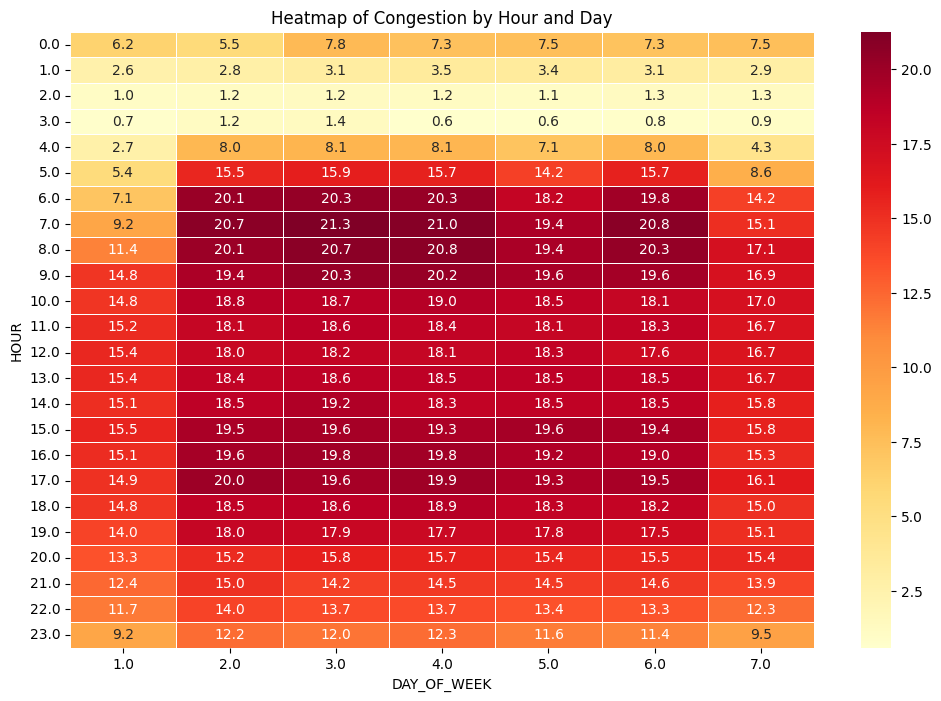

In [ ]:
# Domain Question 1

# Creating a pivot table for heatmap
# - We want to visualize the average 'SPEED' across different hours of the day and days of the week.
# - To achieve this, we create a pivot table where:
#   - 'HOUR' is used as the index (rows) to represent the hours of the day.
#   - 'DAY_OF_WEEK' is used as columns to represent days of the week.
#   - The values in the pivot table are the average speeds ('SPEED') for each hour and day combination.
heatmap_data = df_clean.pivot_table(index='HOUR', columns='DAY_OF_WEEK', values='SPEED', aggfunc='mean')

# Plotting the heatmap
# - We are using a heatmap to visualize the congestion patterns.
# - We set the figure size to 12x8 to ensure a suitable aspect ratio for the heatmap.
# - We are using Seaborn's heatmap function to create the heatmap, providing the pivot table data.
# - We choose the 'YlOrRd' color map for the heatmap, which ranges from yellow (low congestion) to red (high congestion).
# - 'annot=True' adds numerical annotations (average speeds) to the cells of the heatmap.
# - 'fmt=".1f"' formats the annotations to display one decimal place.
# - 'linewidths=0.5' adds white lines between the cells for better readability.
# - We set the title of the heatmap as 'Heatmap of Congestion by Hour and Day'.
# - Finally, we display the heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Congestion by Hour and Day')
plt.show()


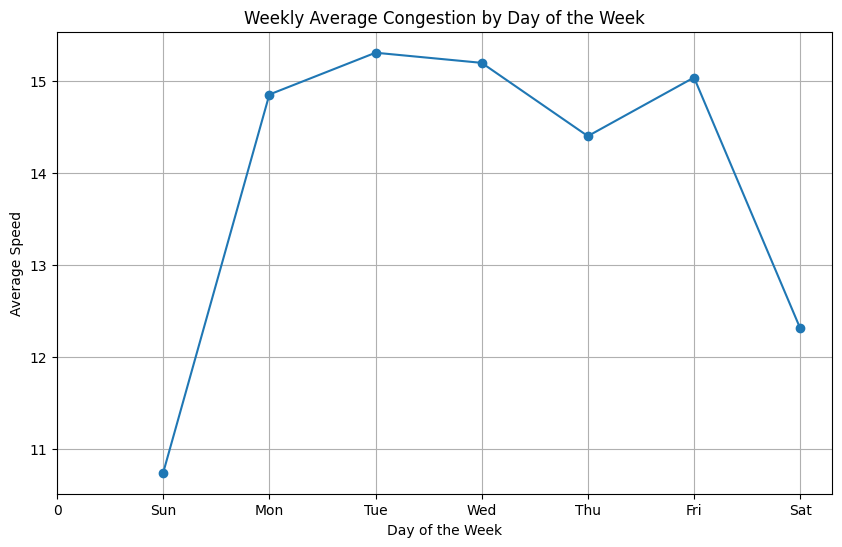

In [ ]:
# Domain Question 1

# Calculating the average congestion by day of the week
# - We want to understand how congestion (average 'SPEED') varies across different days of the week.
# - To achieve this, we group the data by 'DAY_OF_WEEK' and calculate the mean speed for each day.
weekly_avg = df_clean.groupby('DAY_OF_WEEK')['SPEED'].mean()

# Plotting the line chart
# - We create a line chart to visualize the weekly average congestion.
# - We set the figure size to 10x6 to ensure a suitable aspect ratio for the chart.
# - We use the 'plot' function to create a line chart, with data from 'weekly_avg'.
# - We specify 'marker='o'' to include circular markers at data points on the line.
# - We set the title of the chart as 'Weekly Average Congestion by Day of the Week'.
# - We label the x-axis as 'Day of the Week' and the y-axis as 'Average Speed'.
# - We customize the x-axis ticks to show weekdays as ['0','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ].
# - We add grid lines to the chart for better readability.
# - Finally, we display the line chart.
plt.figure(figsize=(10, 6))
weekly_avg.plot(marker='o')
plt.title('Weekly Average Congestion by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed')
plt.xticks(range(8), ['0','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ])
plt.grid()
plt.show()


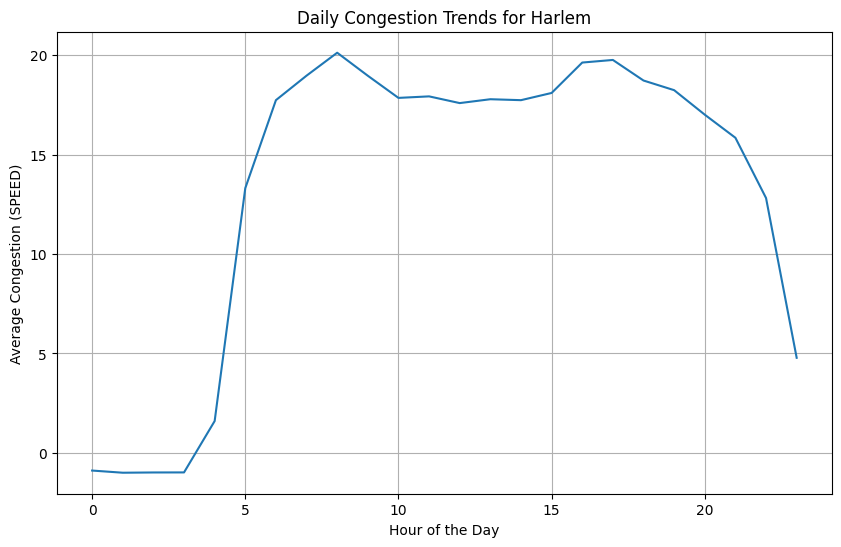

In [ ]:
# Domain Question 2

# Extracting data for a specific street
# - We want to focus on a specific street, 'Harlem,' and understand its daily congestion trends.
# - We filter the cleaned dataset ('df_clean') to obtain data only for the 'Harlem' street.
street_name = 'Harlem'
data_street = df_clean[df_clean['STREET'] == street_name]

# Grouping data by hour and calculate the average congestion for each hour
# - To analyze the daily congestion trends, we group the data for 'Harlem' by the hour of the day.
# - We calculate the average congestion (average 'SPEED') for each hour.
hourly_congestion = data_street.groupby('HOUR')['SPEED'].mean()

# Creating a line plot
# - We create a line plot to visualize the daily congestion trends for the 'Harlem' street.
# - The figure size is set to 10x6 for a suitable aspect ratio.
# - We use Seaborn's 'lineplot' function to create the line chart with 'hourly_congestion' data.
# - The x-axis represents the 'Hour of the Day (HOUR)' and the y-axis represents 'Average Congestion (SPEED).'
# - The chart's title includes the name of the street, making it specific to 'Harlem.'
# - Grid lines are added to the chart for better readability.
# - Finally, we display the line chart.
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_congestion.index, y=hourly_congestion.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Congestion (SPEED)')
plt.title(f'Daily Congestion Trends for {street_name}')
plt.grid(True)
plt.show()


<ipython-input-7-51e0516f4e36>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_street_data, x='STREET', y='SPEED', ci=None, palette='viridis')


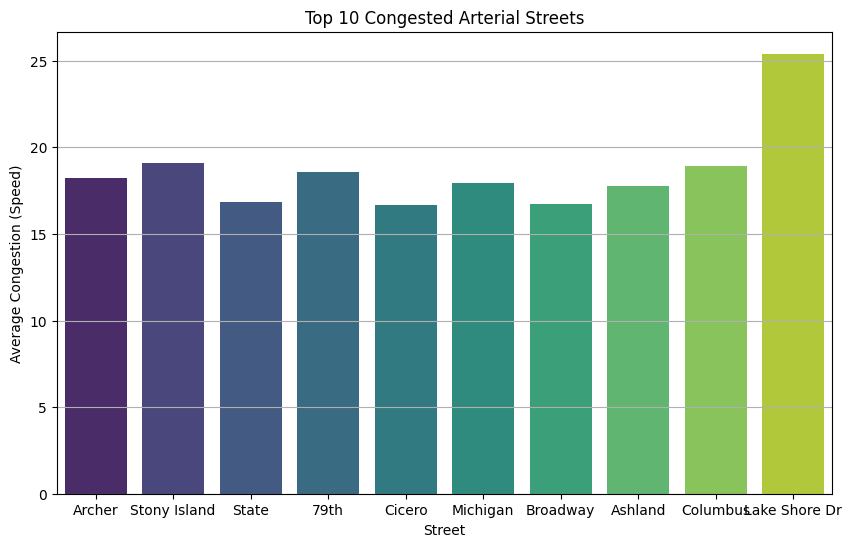

In [ ]:
# Domain Question 1

# Locate Highly Congested Streets

# Creating a figure for the visualization
# - We begin by creating a figure with a specific size (10x6) to ensure a clear and appropriately sized plot.
plt.figure(figsize=(10, 6))

# Identifying the top congested streets
# - To locate the highly congested streets, we perform the following steps:
#   1. Group the data by the 'STREET' column.
#   2. Calculate the mean 'SPEED' for each street.
#   3. Select the top 10 streets with the highest average congestion speed.
# - This helps us find the streets with the worst congestion issues.
top_streets = df.groupby('STREET')['SPEED'].mean().nlargest(10).index

# Filtering data for the top congested streets
# - We filter the dataset to include only data related to the top congested streets identified earlier.
top_street_data = df[df['STREET'].isin(top_streets)]

# Creating a bar plot
# - We use Seaborn's 'barplot' function to create a bar chart to visualize congestion levels for the top streets.
# - The x-axis represents the street names ('STREET'), and the y-axis represents 'Average Congestion (SPEED).'
# - We set 'ci' to 'None' to exclude confidence intervals.
# - A specific color palette ('viridis') is applied to the bars for better visualization.
sns.barplot(data=top_street_data, x='STREET', y='SPEED', ci=None, palette='viridis')

# Setting labels and title
# - We provide labels for the x-axis ('STREET') and y-axis ('Average Congestion (SPEED)').
# - The chart is given a meaningful title indicating that it displays the top 10 congested arterial streets.
plt.xlabel('Street')
plt.ylabel('Average Congestion (Speed)')
plt.title('Top 10 Congested Arterial Streets')

# Adding grid lines for reference
# - Grid lines are added to the y-axis to help users reference the congestion values.
plt.grid(axis='y')

# Displaying the plot
# - Finally, we use 'plt.show()' to display the bar chart to the user.
plt.show()


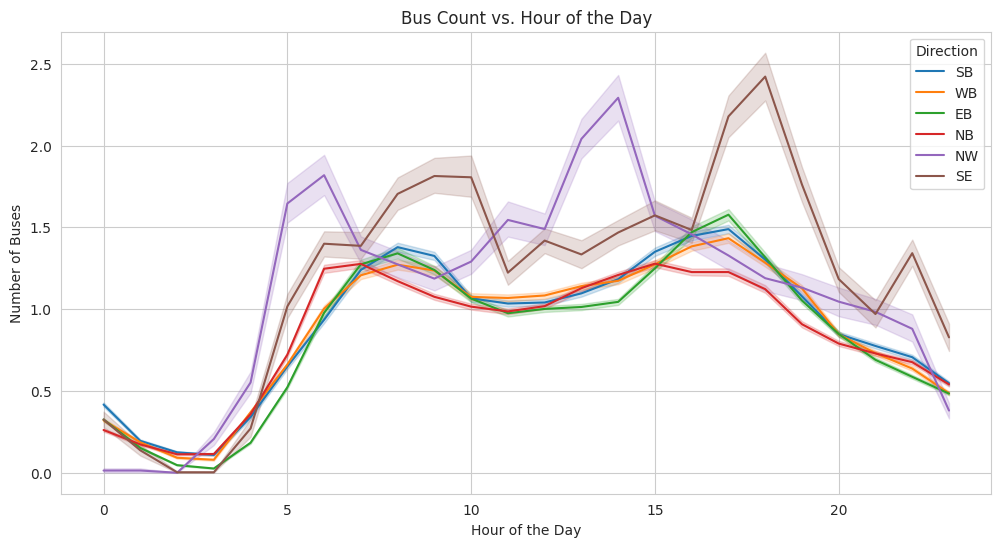

In [ ]:
# Setting the plotting style

# Configuring the plotting style
# - We set the plotting style to "whitegrid" using Seaborn's 'set_style' function.
# - This style choice adds a white grid in the background, improving readability.
sns.set_style("whitegrid")

# Creating the time series plot

# Creating a figure for the time series plot
# - We start by creating a figure with a specific size (12x6) to ensure a clear and appropriately sized plot.
plt.figure(figsize=(12, 6))

# Creating a line plot for time series data
# - We use Seaborn's 'lineplot' function to generate a time series plot.
# - The 'df_clean' DataFrame is used as the data source.
# - The x-axis represents the 'HOUR' (hour of the day), the y-axis represents 'BUS_COUNT' (number of buses),
#   and different lines are drawn based on the 'DIRECTION' column.
# - This helps visualize how the number of buses varies by the hour of the day for different directions.
sns.lineplot(data=df_clean, x='HOUR', y='BUS_COUNT', hue='DIRECTION')

# Setting labels and title
# - We add labels to the x-axis ("Hour of the Day") and y-axis ("Number of Buses").
# - A meaningful title ("Bus Count vs. Hour of the Day") is set to describe the content of the plot.
# - A legend is included with the title "Direction" to clarify the color-coding for different directions.
plt.title("Bus Count vs. Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Buses")
plt.legend(title='Direction')

# Displaying the plot
# - Finally, we use 'plt.show()' to display the time series plot to the user.
plt.show()


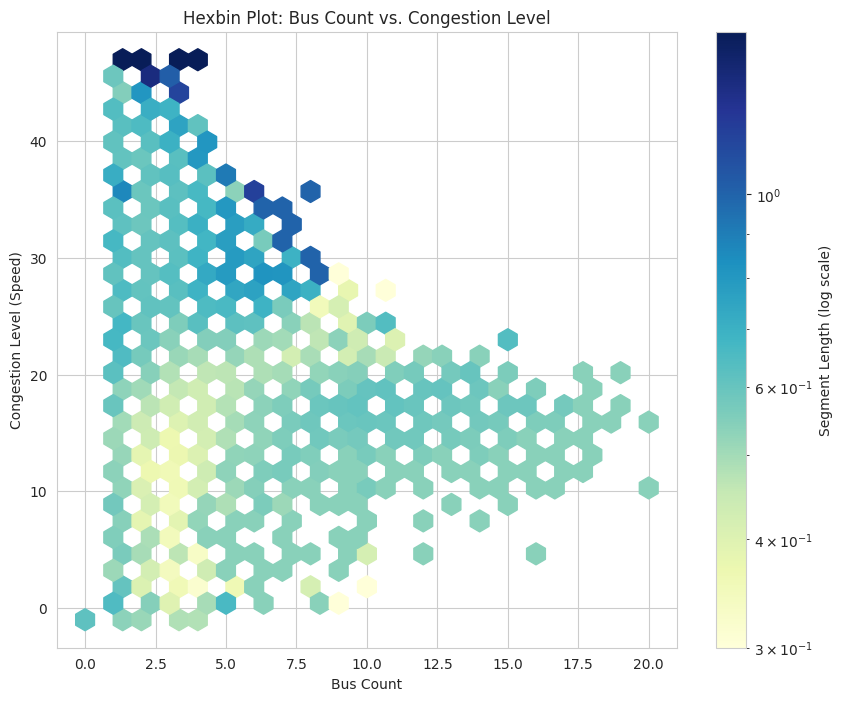

In [ ]:
# Hexbin plot:

# Extracting relevant columns

# Selecting the relevant columns from the 'df_clean' DataFrame, which are 'BUS_COUNT', 'SPEED', and 'LENGTH'.
hexbin = df_clean[['BUS_COUNT', 'SPEED', 'LENGTH']]

# Setting up the hexbin plot

# Creating a figure for the hexbin plot with a specified size (10x8) for better visualization.
plt.figure(figsize=(10, 8))

# Generating a hexbin plot
# - Hexbin plots are a way to visualize the relationship between two numeric variables.
# - 'x' represents 'BUS_COUNT' on the x-axis, and 'y' represents 'SPEED' on the y-axis.
# - 'C' (color) is set to 'LENGTH', which means the color of each hexbin will represent the 'LENGTH' value.
# - 'gridsize=30' controls the number of hexagonal bins, with a higher number creating smaller bins.
# - 'cmap' specifies the color map ('YlGnBu' in this case) used for the hexbins.
# - 'bins' is set to 'log' to use a logarithmic scale for the color intensity.
plt.hexbin(x=hexbin['BUS_COUNT'], y=hexbin['SPEED'], C=hexbin['LENGTH'], gridsize=30, cmap='YlGnBu', bins='log')

# Adding a color bar with a label
# - A color bar is added to the plot to show how colors correspond to segment length values.
# - 'label' is set to 'Segment Length (log scale)' to describe the color bar's meaning.
plt.colorbar(label='Segment Length (log scale)')

# Labeling the axes and provide a title
# - Labels for the x-axis ('BUS COUNT') and the y-axis ('Congestion Level (SPEED)') are added.
# - A title ('Hexbin Plot: Bus Count vs. Congestion Level') is set to describe the content of the plot.
plt.xlabel('Bus Count')
plt.ylabel('Congestion Level (Speed)')
plt.title('Hexbin Plot: Bus Count vs. Congestion Level')

# Displaying the plot
# - Finally, 'plt.show()' is used to display the hexbin plot.
plt.show()


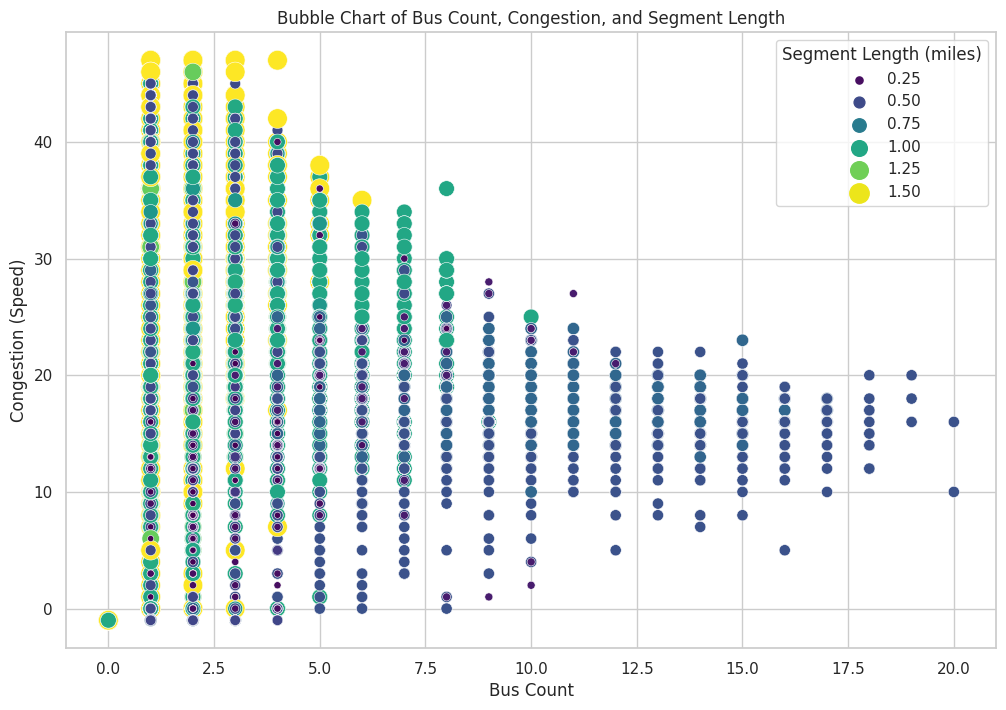

In [ ]:
# Domain Question 3
# Cleaning the data by removing rows with missing values in 'BUS_COUNT', 'SPEED', and convert 'BUS_COUNT' to numeric.
traffic_data_bubble = df_clean.dropna(subset=['BUS_COUNT', 'SPEED', 'LENGTH'])
traffic_data_bubble['BUS_COUNT'] = pd.to_numeric(traffic_data_bubble['BUS_COUNT'], errors='coerce')

# Creating a bubble chart

# Creating a figure for the bubble chart with a specified size (12x8) for better visualization.
plt.figure(figsize=(12, 8))

# Setting the style for the plot to "whitegrid" for a clean background.
sns.set(style="whitegrid")

# Creating a scatterplot (bubble chart):
# - 'x' represents 'BUS_COUNT' on the x-axis.
# - 'y' represents 'SPEED' on the y-axis.
# - 'size' determines the size of bubbles based on the 'LENGTH' column.
# - 'data' specifies the source DataFrame for plotting.
# - 'sizes' sets the range for the bubble sizes (between 20 and 200), allowing variations in bubble size.
# - 'hue' colors the bubbles based on 'LENGTH,' which represents segment length.
# - 'palette' specifies the color palette ('viridis') used for bubble points.

sns.scatterplot(
    x='BUS_COUNT',
    y='SPEED',
    size='LENGTH',
    data=traffic_data_bubble,
    sizes=(20, 200),  # Adjust the size range of bubbles
    hue='LENGTH',     # Color bubbles by segment length
    palette='viridis'  # Color palette for bubble points
)

# Labeling the axes and provide a title
# - Labels for the x-axis ('BUS_COUNT') and the y-axis ('Congestion (SPEED)') are added.
# - A title ('Bubble Chart of Bus Count, Congestion, and Segment Length') is set to describe the content of the plot.

plt.xlabel('Bus Count')
plt.ylabel('Congestion (Speed)')
plt.title('Bubble Chart of Bus Count, Congestion, and Segment Length')

# Adding a legend with a title for segment length
# - A legend is added to provide context for the 'LENGTH' variable with a title ('Segment Length (miles)').

plt.legend(title='Segment Length (miles)')

# Displaying the bubble chart
# - Finally, 'plt.show()' is used to display the bubble chart.

plt.show()


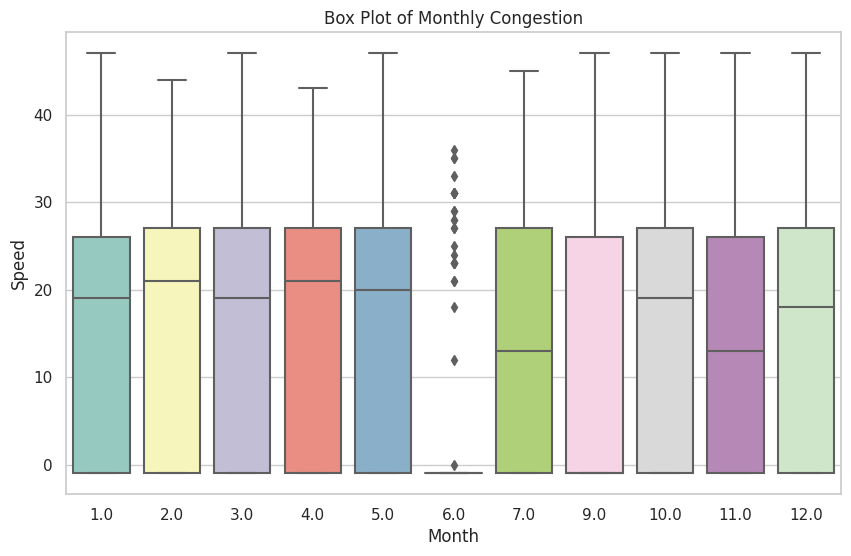

In [ ]:
# Domain Question 4
# Creating a box plot for monthly congestion

# Creating a figure for the box plot with a specified size (10x6) for better visualization.
plt.figure(figsize=(10, 6))

# Creating a box plot:
# - 'x' represents the 'MONTH' column on the x-axis, categorizing data by months.
# - 'y' represents the 'SPEED' column on the y-axis, showing congestion speed.
# - 'data' specifies the source DataFrame for plotting.
# - 'palette' sets the color palette for the boxes.

sns.boxplot(x='MONTH', y='SPEED', data=df_clean, palette='Set3')

# Adding a title and labels for axes
# - A title ('Box Plot of Monthly Congestion') is set to describe the content of the plot.
# - Labels for the x-axis ('MONTH') and the y-axis ('SPEED') are added to provide context.

plt.title('Box Plot of Monthly Congestion')
plt.xlabel('Month')
plt.ylabel('Speed')

# Displaying the box plot
# - Finally, 'plt.show()' is used to display the box plot.

plt.show()


<ipython-input-12-1a153d1eb7e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_columns['MONTH'] = pd.to_datetime(df_relevant_columns['MONTH'], format='%m')


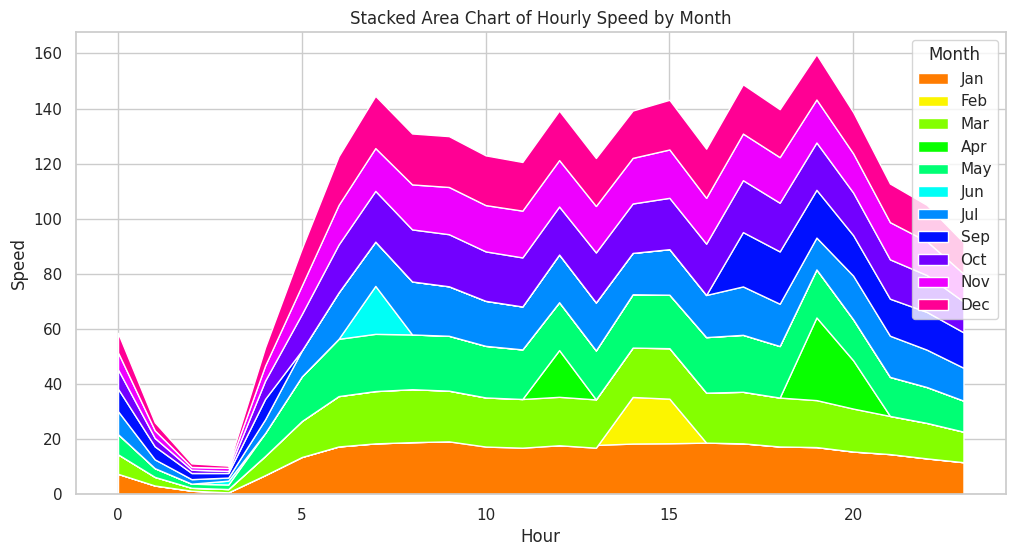

In [ ]:
# Extracting relevant columns
df_relevant_columns = df_clean[['HOUR', 'SPEED', 'MONTH']]

# Converting 'MONTH' column to datetime
df_relevant_columns['MONTH'] = pd.to_datetime(df_relevant_columns['MONTH'], format='%m')

# Group and aggregate data by 'HOUR' and 'MONTH'
hourly_congestion = df_relevant_columns.groupby(['HOUR', 'MONTH'])['SPEED'].mean().unstack()

# Filling any missing values with 0
hourly_congestion = hourly_congestion.fillna(0)

# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating a stacked area chart using stackplot
colors = sns.color_palette("hsv", len(hourly_congestion.columns))
plt.stackplot(hourly_congestion.index, hourly_congestion.values.T, labels=[month.strftime('%b') for month in hourly_congestion.columns], colors=colors)

# Setting labels and title
plt.xlabel("Hour")
plt.ylabel("Speed")
plt.title("Stacked Area Chart of Hourly Speed by Month")

# Displaying the legend
plt.legend(title="Month")

# Displaying the chart
plt.show()


<ipython-input-13-46f3df81981a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SPEED', y=top_segment_data['SEGMENT_ID'].astype(int), data=top_segment_data, ci=None, orient='h')


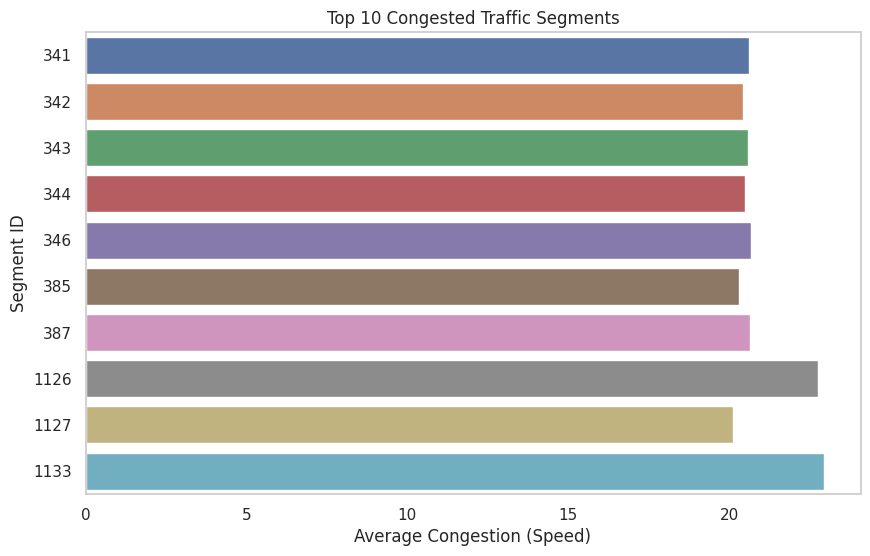

In [ ]:
# Domain Question 5

# Creating a figure for the bar chart with specified dimensions
plt.figure(figsize=(10, 6))

# Grouping the data by 'SEGMENT_ID,' calculate the mean 'SPEED,' and select the top 10 segments with the highest mean speed
top_segments = df_clean.groupby('SEGMENT_ID')['SPEED'].mean().nlargest(10).index

# Filtering the original data to include only the top 10 congested segments
top_segment_data = df_clean[df_clean['SEGMENT_ID'].isin(top_segments)]

# Creating a horizontal bar plot (barplot) to visualize congestion
# 'x' corresponds to 'SPEED,' 'y' to 'SEGMENT_ID,' and 'data' is the filtered top_segment_data
# 'ci' is set to None, so no confidence intervals are plotted
# 'orient' is set to 'h' to create a horizontal bar plot
sns.barplot(x='SPEED', y=top_segment_data['SEGMENT_ID'].astype(int), data=top_segment_data, ci=None, orient='h')

# Setting the label for the x-axis
plt.xlabel('Average Congestion (Speed)')

# Setting the label for the y-axis
plt.ylabel('Segment ID')

# Setting the title for the chart
plt.title('Top 10 Congested Traffic Segments')

# Adding a grid to the x-axis
plt.grid(axis='x')

# Displaying the plot
plt.show()


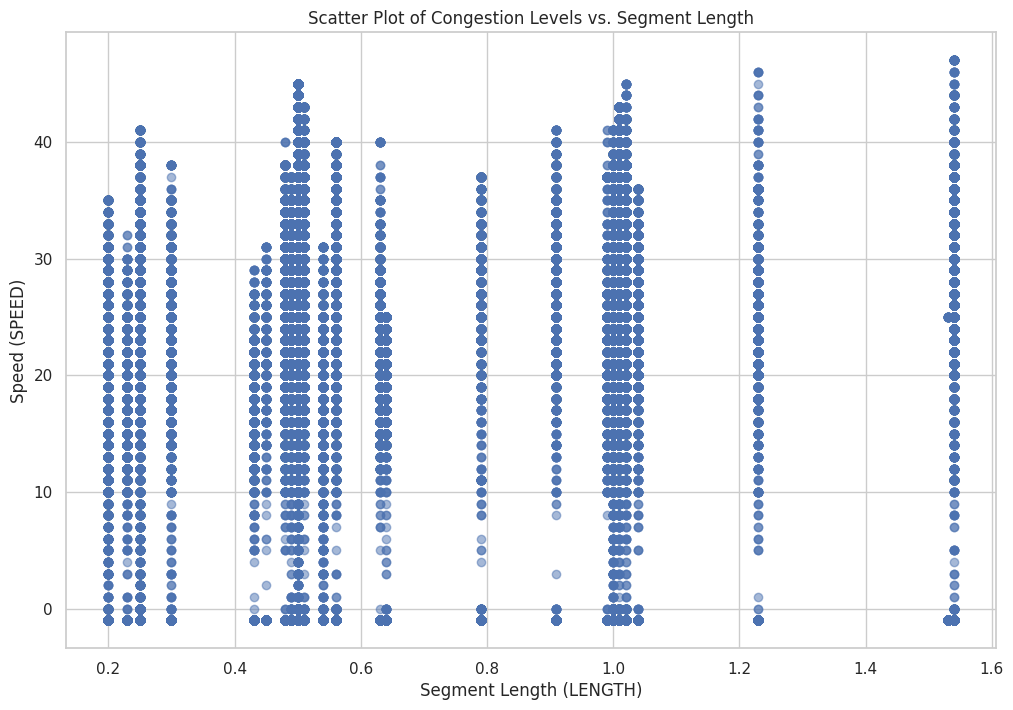

In [ ]:
# Domain Question 6

# Creating a figure for the scatter plot with specified dimensions
plt.figure(figsize=(12, 8))

# Creating a scatter plot to visualize the relationship between 'LENGTH' and 'SPEED'
# 'df_clean['LENGTH']' represents the x-axis, 'df_clean['SPEED']' represents the y-axis
# 'alpha' is set to 0.5 to control the transparency of points, making overlapping points more visible
plt.scatter(df_clean['LENGTH'], df_clean['SPEED'], alpha=0.5)

# Setting the title for the scatter plot
plt.title('Scatter Plot of Congestion Levels vs. Segment Length')

# Setting the label for the x-axis
plt.xlabel('Segment Length (LENGTH)')

# Setting the label for the y-axis
plt.ylabel('Speed (SPEED)')

# Enabling grid lines on the plot for reference
plt.grid(True)

# Displaying the scatter plot
plt.show()


In [ ]:
# Convert the 'TIME' column to a datetime format, handling errors by coercing them to NaT (Not a Timestamp).
v = pd.to_datetime(df_clean['TIME'], errors='coerce')

# Extract the time component from the datetime and create a new 'Time' column.
df_clean['Time'] = v.dt.time

# Extract the date component (flooring to the day) from the datetime and create a new 'Date' column.
df_clean['Date'] = v.dt.floor('D')

# Display the first 10 rows of the cleaned DataFrame to check the changes.
df_clean.head(10)

# Display the shape (number of rows and columns) of the DataFrame before further cleaning.
df_clean.shape

# Filter the DataFrame to keep only rows where the 'SPEED' is greater than or equal to 0 (removing negative values).
df_clean = df_clean[df_clean['SPEED'] >= 0]

# Display the shape of the DataFrame after removing rows with negative 'SPEED' values.
df_clean.shape

<ipython-input-15-d3c62cbb96c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Time'] = v.dt.time
<ipython-input-15-d3c62cbb96c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = v.dt.floor('D')


(627073, 24)

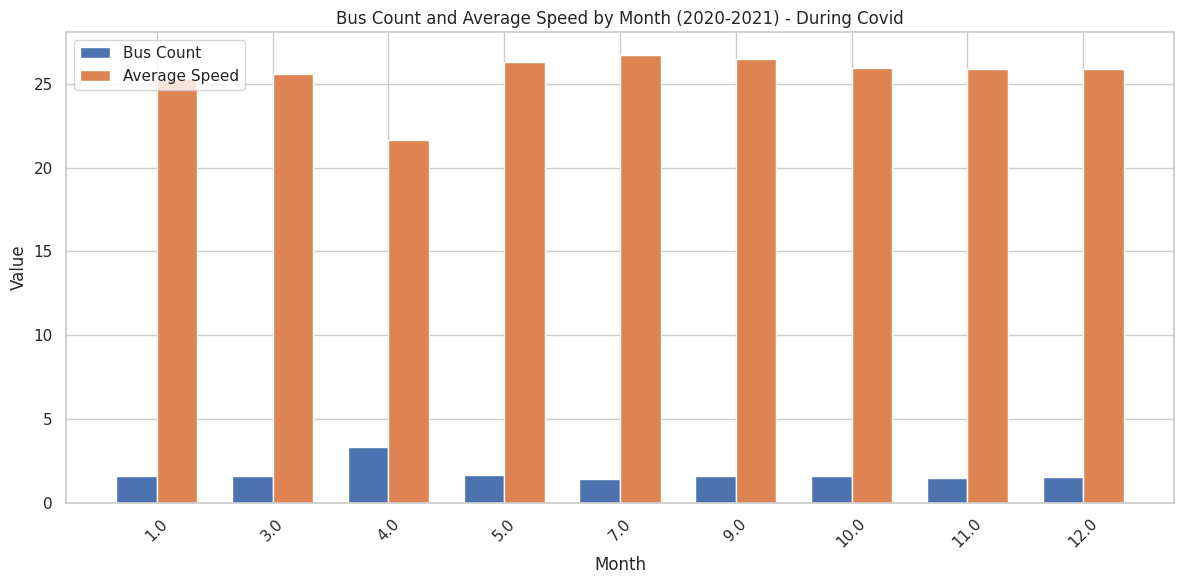

In [ ]:
# Filtering the data for dates from 2020 to 2021
filtered_data = df_clean[(df_clean['Date'] >= '2020-01-01') & (df_clean['Date'] <= '2021-12-31')]

# Grouping and aggregating the data by 'MONTH' to calculate the average 'BUS_COUNT' and 'SPEED'
grouped_data = filtered_data.groupby('MONTH').agg({'BUS_COUNT': 'mean', 'SPEED': 'mean'}).reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
bar_width = 0.35

plt.bar(x, grouped_data['BUS_COUNT'], width=bar_width, label='Bus Count', align='center')
plt.bar([i + bar_width for i in x], grouped_data['SPEED'], width=bar_width, label='Average Speed', align='center')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Bus Count and Average Speed by Month (2020-2021) - During Covid')

# Setting X-axis labels
plt.xticks([i + bar_width/2 for i in x], grouped_data['MONTH'], rotation=45)

# Displaying the chart with a legend
plt.legend()

# Showing the plot
plt.tight_layout()
plt.show()

#We observe here that during 2020-2021 the speed in each record is with negative value. In order to provide correct insights, we have ignored all the negative values. So we could not see the insights for both 2nd and 8th month.

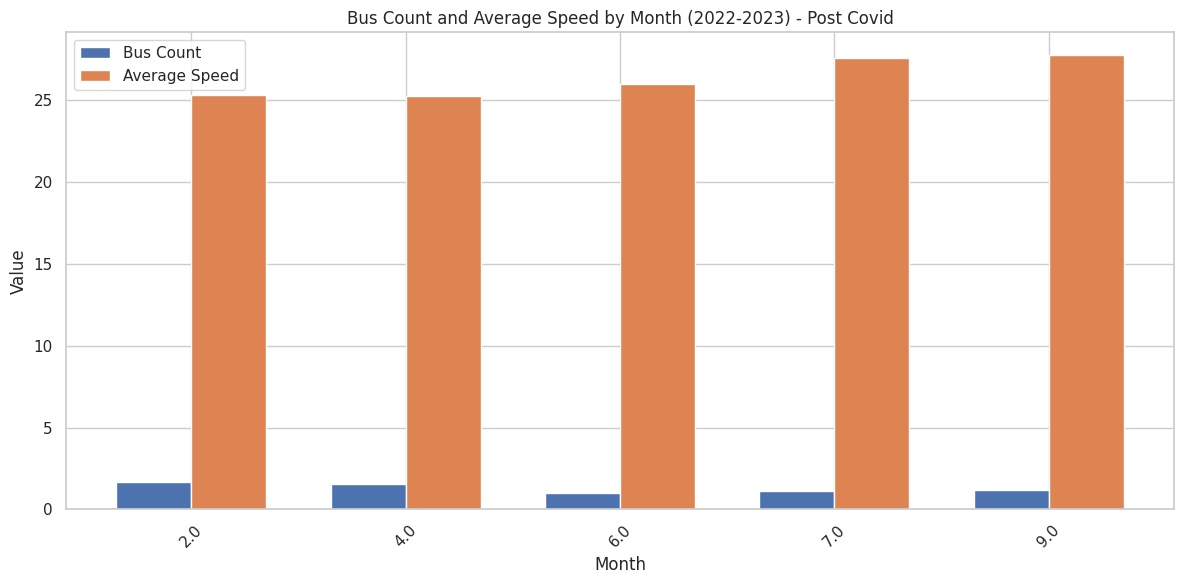

In [ ]:
# Filtering the data for dates from 2020 to 2021
filtered_data = df_clean[(df_clean['Date'] >= '2022-01-01') & (df_clean['Date'] <= '2023-12-31')]

# Grouping and aggregating the data by 'MONTH' to calculate the average 'BUS_COUNT' and 'SPEED'
grouped_data = filtered_data.groupby('MONTH').agg({'BUS_COUNT': 'mean', 'SPEED': 'mean'}).reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
bar_width = 0.35

plt.bar(x, grouped_data['BUS_COUNT'], width=bar_width, label='Bus Count', align='center')
plt.bar([i + bar_width for i in x], grouped_data['SPEED'], width=bar_width, label='Average Speed', align='center')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Bus Count and Average Speed by Month (2022-2023) - Post Covid')

# Setting X-axis labels
plt.xticks([i + bar_width/2 for i in x], grouped_data['MONTH'], rotation=45)

# Displaying the chart with a legend
plt.legend()

# Showing the plot
plt.tight_layout()
plt.show()

#We observe here that during 2020-2021 the speed in each record is with negative value. In order to provide correct insights, we have ignored all the negative values. So we could not see the insights for both 2nd and 8th month.